# F: Estudio de isofotas

Una isofota se define como:

"Una línea que une puntos con el mismo brillo superficial en un diagrama o una imagen de un objeto celeste como una galaxia o una nebulosa." 

El brillo superficial $\mu$ (mu) generalmente se mide en magnitudes por segundo de arco al cuadrado. La suma de toda la luz dentro de una isofota dada se denomina magnitud isofotal.

Si el perfil luminoso de una galaxia es elíptico, sus isofotas serán elipses.

El paquete ``isophote`` proporciona herramientas para ajustar isófotas elípticas a una imagen de una galaxia. Las isófotas de la imagen se miden usando un método iterativo descrito por [Jedrzejewski (1987; MNRAS 226, 747)](https://academic.oup.com/mnras/article/226/4/747/1003560?login=false).

Para este ejemplo, vamos a crear una imagen de galaxia simulada simple:

In [1]:
from astropy.modeling.models import Gaussian2D
import numpy as np
from photutils.datasets import make_noise_image
import matplotlib.pyplot as plt

In [2]:
g = Gaussian2D(100., 75, 75, 20, 12, theta=40. * np.pi / 180.) # generamos una gausiana eliptica en 2d girada 40 grados
ny = nx = 150 #cantidad de pixeles en x e y
y, x = np.mgrid[0:ny, 0:nx]
noise = make_noise_image((ny, nx), distribution='gaussian', mean=0., # metemos algo de ruido
                         stddev=2., seed=1234) 
data = g(x, y) + noise

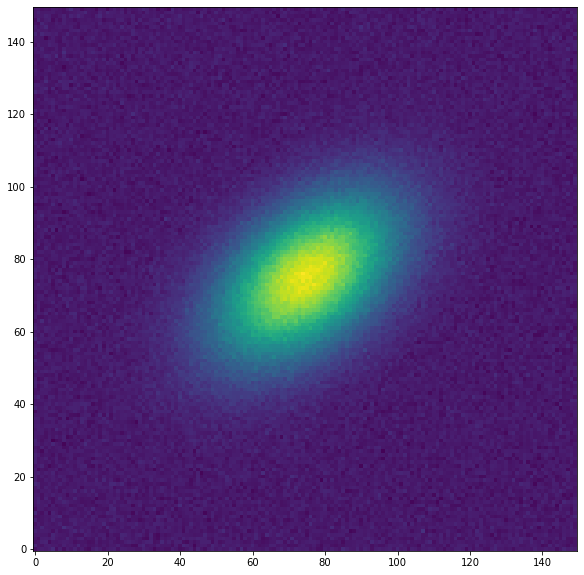

In [3]:
plt.figure("Galaxia", figsize=[10, 10])
plt.imshow(data, origin='lower')
plt.show()

Debemos proporcionar una elipse al ajuste de las isófotas como condición inicial. Esta geometría de la elipse se define con la clase `EllipseGeometry`. Aquí definiremos una elipse inicial cuyo ángulo de posición está desplazado respecto los datos.

In [4]:
from photutils.isophote import EllipseGeometry
geometry = EllipseGeometry(x0=75, y0=75, sma=20, eps=0.5,
                           pa=20. * np.pi / 180.)

Vamos a mostrar esta elipse inicial:

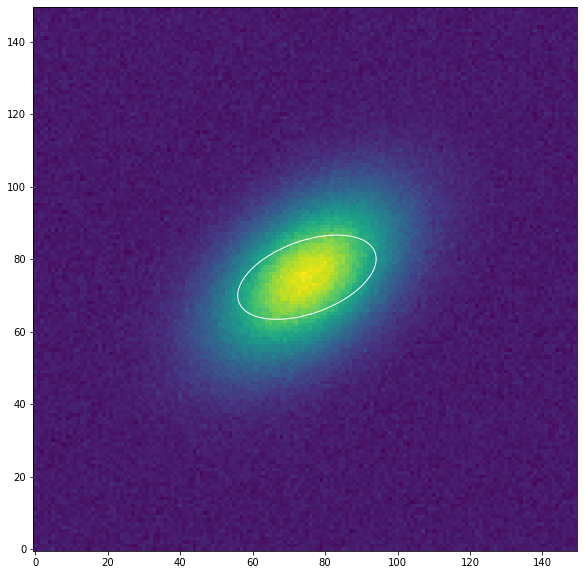

In [5]:
from photutils.aperture import EllipticalAperture
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
plt.figure("Galaxia", figsize=[10, 10])
plt.imshow(data, origin='lower')
aper.plot(color='white')
plt.show()

A continuación, creamos una instancia de la clase ``Ellipse``, donde tendremos en cuenta los datos que se ajustarán, es decir la imagen de la galaxia y la elipse inicial:

In [6]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data, geometry)

Para realizar el ajuste de isófotas elípticas, ejecutamos el método ``fit_image()`` :

In [7]:
isolist = ellipse.fit_image()

El resultado es una lista de isófotas, cuyos atributos son los valores del ajuste para cada una de las isofotas ordenadas por la longitud del semieje mayor. Veamos los ángulos de posición de ajuste (en radianes):

In [8]:
isolist.pa

array([0.00000000e+00, 2.58557691e-02, 1.24258032e-02, 2.81651474e-03,
       3.10564077e+00, 3.01432668e+00, 2.91207413e+00, 2.55353790e+00,
       3.27667134e-01, 3.12991751e+00, 3.12991751e+00, 1.60073797e-02,
       3.13170982e+00, 8.28190557e-02, 1.04356317e-01, 1.58706115e-01,
       3.20421940e-01, 3.82976829e-01, 4.85453395e-01, 7.06300855e-01,
       1.14601352e+00, 1.00547579e+00, 9.73052854e-01, 6.24088491e-01,
       5.79963706e-01, 6.24163539e-01, 7.36384503e-01, 7.64785040e-01,
       6.98341037e-01, 6.77667042e-01, 6.81952942e-01, 6.27394019e-01,
       6.64901758e-01, 6.91061656e-01, 6.96059953e-01, 6.93651837e-01,
       6.86072223e-01, 6.78834001e-01, 6.91164283e-01, 7.06300855e-01,
       6.87382951e-01, 6.78429447e-01, 6.91862441e-01, 6.88541138e-01,
       6.89746530e-01, 7.04616954e-01, 6.98198654e-01, 7.02949641e-01,
       6.87174406e-01, 6.87174406e-01, 6.87174406e-01, 7.36770379e-01,
       7.36770379e-01, 7.36770379e-01])

También podemos mostrar los valores de las isófotas como una tabla, que nuevamente se ordena por la longitud del semieje mayor (``sma``):

In [9]:
print(isolist.to_table()) 

       sma               intens            intens_err      ... niter stop_code
                                                           ...                
------------------ ------------------ -------------------- ... ----- ---------
               0.0  103.3660741932861                  0.0 ...     0         0
0.5346972612827552 101.85768930454661 0.030160181107668268 ...    10         0
0.5881669874110307 101.68151143393658 0.028309622593685645 ...    10         0
0.6469836861521338   101.505670787118 0.025866912481304023 ...    11         0
0.7116820547673471   101.372109520222  0.03225393307834451 ...    10         0
0.7828502602440819 101.18631230115908   0.0361583334561795 ...    10         0
0.8611352862684901 100.96908841886025  0.03258843615160212 ...    10         0
0.9472488148953392 100.78891350007841 0.049768537796437626 ...    10         0
1.0419736963848731 100.42647733875044  0.08087063557978552 ...    19         0
1.1461710660233606  100.2813456048825  0.08525970834

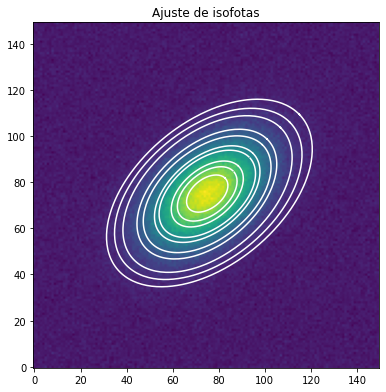

In [10]:
fig, (ax1) = plt.subplots(figsize=(14, 5), nrows=1, ncols=1)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, origin='lower')
ax1.set_title('Ajuste de isofotas')

smas = np.linspace(10, 50, 10) # definimos ciertos valores de sma
for sma in smas:
    iso = isolist.get_closest(sma) # vemos las isofotas que estan mas cerca de los sma definidas
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

Vemos varios parámetros de del ajuste de las isofotas

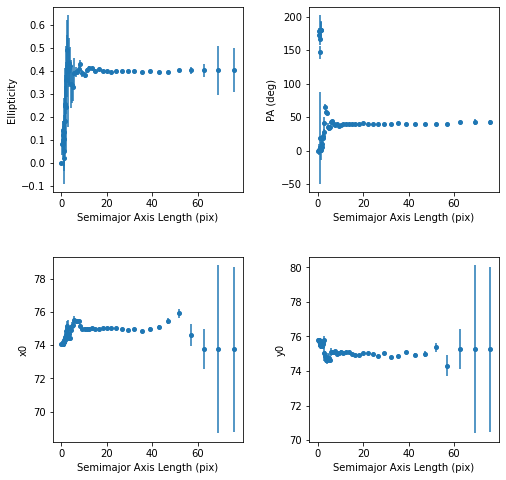

In [11]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.subplot(2, 2, 1)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err,
             fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipticity')

plt.subplot(2, 2, 2)
plt.errorbar(isolist.sma, isolist.pa / np.pi * 180.,
             yerr=isolist.pa_err / np.pi * 80., fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('PA (deg)')

plt.subplot(2, 2, 3)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('x0')

plt.subplot(2, 2, 4)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('y0')
plt.show()

Podemos construir una imagen modelo a partir del objeto IsophoteList usando la funcion ``build_ellipse_model()``:

In [12]:
from photutils.isophote import build_ellipse_model
model_image = build_ellipse_model(data.shape, isolist)

Finalmente, graficamos los datos originales, superpuestos con algunas de las isófotas, la imagen del modelo elíptico y la imagen residual:

Text(0.5, 1.0, 'Residual')

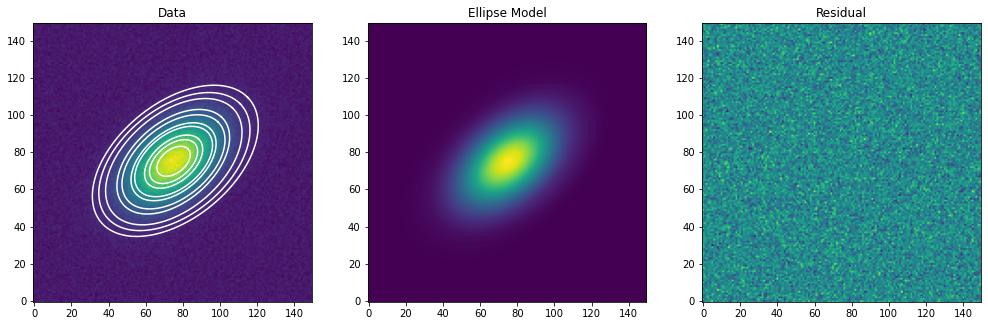

In [13]:
residual = data - model_image

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 5), nrows=1, ncols=3)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, origin='lower')
ax1.set_title('Data')

smas = np.linspace(10, 50, 10)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

ax2.imshow(model_image, origin='lower')
ax2.set_title('Ellipse Model')

ax3.imshow(residual, origin='lower')
ax3.set_title('Residual')

## Ejemplo de isofotas M51

Usaremos un ejemplo real de la galaxia M51. Tenemos que tener en cuenta que M51, con sus brazos espirales y regiones HII, no es la mejor galaxia para el análisis por el algoritmo de 'ellipse', ya que asume que las isófotas son principalmente de forma elíptica. Por otro lado, la imagen M51 es ideal para comprobar la eficiencia del algoritmo frente a la contaminación de la imagen por características no elípticas.

Vamos a leer nuestra imagen desde una URL

In [14]:
from astropy.io import fits
from astropy.utils.data import download_file

url = 'https://github.com/astropy/photutils-datasets/raw/main/data/isophote/M51.fits'
path = download_file(url)
hdu = fits.open(path)
data = hdu[0].data
hdu.close()

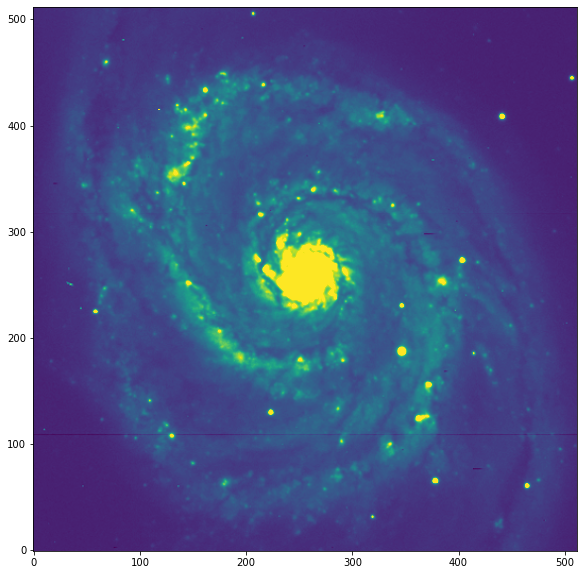

In [15]:
plt.figure("Galaxia M51", figsize=[10, 10])
plt.imshow(data,vmin=np.nanmin(data), vmax=np.median(data)*5, origin='lower')
plt.show()

A continuación, creamos una instancia de la clase ``Ellipse``, pasando los datos como argumento:

In [16]:
ellipse = Ellipse(data)

Finalmente, ejecutamos el método `fit_image` en la instancia, obteniendo una instancia de la clase `IsophoteList`.

In [17]:
isolist = ellipse.fit_image()

Podemos mostrar los resultados como una tabla de `Astropy` usando el método `to_table()`.

In [18]:
isolist.to_table()

<QTable length=47>
       sma               intens           intens_err     ... niter stop_code
                                                         ...                
     float64            float64            float64       ... int64   int64  
------------------ ------------------ ------------------ ... ----- ---------
               0.0  7599.717294788001                0.0 ...     0         0
0.5209868481924366  6872.362642328264  21.75991191784185 ...    10         0
0.5730855330116803 6787.7596643967745 23.703884018022443 ...    10         0
0.6303940863128483  6706.655564646043  26.52608654071905 ...    10         0
0.6934334949441332  6605.618026772664  26.90823576101933 ...    10         0
0.7627768444385465  6505.067725856663 27.862651905241034 ...    10         0
0.8390545288824012   6393.16880692168 30.604625743379216 ...    10         0
0.9229599817706413  6242.942578014302  32.38817897920468 ...    50         2
1.0152559799477054  6119.227535645168 30.274891191791028 ...    10         0
               ...                ...                ... ...   ...       ...
16.105100000000004  913.8252684213763    8.3673828008909 ...    50         2
17.715610000000005  888.2607786786102  8.339464194778207 ...    10         0
19.487171000000007  755.5125850904043  7.545402423863614 ...    10         0
 21.43588810000001  684.3778626505388 7.5610914225185235 ...    10         0
23.579476910000015  668.4406957028795   9.52525486562469 ...    10         0
25.937424601000018  528.4765834709417  6.494437616153309 ...    10         0
 28.53116706110002  536.4830624373216  7.371283876324426 ...    18         0
31.384283767210025 366.23458897445755  5.916386879889295 ...    50         2
 34.52271214393103 311.40937912919605  5.079300142524587 ...     5         5
 37.97498335832414 277.49572187366573  5.509825477598249 ...     3         5

Verificamos el tipo de resultados, debe ser una instancia de la clase ``IsophoteList``:

In [19]:
type(isolist)

photutils.isophote.isophote.IsophoteList

Mostramos los resultados:

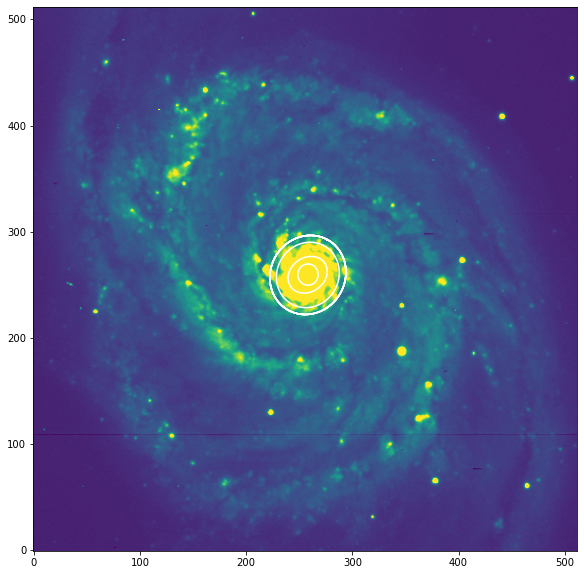

In [20]:
plt.figure("Galaxia M51", figsize=[10, 10])
plt.imshow(data,vmin=np.nanmin(data), vmax=np.median(data)*5, origin='lower')
smas = np.linspace(10, 100, 10)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    plt.plot(x, y, color='white')
plt.show()

### Ejecutando ``Ellipse`` de una manera más detallada:

Podemos ajustar elipses individuales, simplemente llamando al método ``fit_isophote`` en la misma instancia de ``Ellipse`` (pasando la longitud del semieje mayor al método):

In [21]:
isophote = ellipse.fit_isophote(sma=20.)

isophote.to_table()

<QTable length=1>
  sma        intens          intens_err    ... nflag niter stop_code
                                           ...                      
float64     float64           float64      ... int64 int64   int64  
------- ---------------- ----------------- ... ----- ----- ---------
   20.0 734.422133462885 7.140777819896603 ...     0    13         0

Tenemos que tener en cuenta que en este caso obtenemos una instancia de la clase `Isophote`, no `IsophoteList` como antes:

In [22]:
type(isophote)

photutils.isophote.isophote.Isophote

El algoritmo de ajuste es bastante sensible a las condiciones iniciales de la posición `x` e `y` del centro de la galaxia en la imagen. Cuando se usan valores predeterminados como en los ejemplos anteriores, los métodos asumen que la galaxia está exactamente centrada en la imagen, pero esto puede no ser así. 

El algoritmo de ajuste también puede fallar en la convergencia si la elipticidad o el ángulo de posición (PA) del semieje mayor están demasiado alejados de los valores reales. Para anular los valores predeterminados, podemos inicializar `Ellipse` con una instancia de `EllipeGeometry`.

In [23]:
# el usuario define aquí los parámetros de geometría que se utilizarán como primera suposición.
x0 = 256.    # posicion central
y0 = 256.    # posicion central
sma = 20.    # longitud del semieje mayor en pixeles
eps = 0.2    # elipticidad

#el ángulo de posición se define en radianes, 
#en sentido antihorario desde el eje +X (girando hacia el eje +Y)
#aquí usamos 35 grados como una primera suposición.

pa = 35. / 180. * np.pi

# tenga en cuenta que EllipseGeometry tiene parámetros adicionales 
#con valores predeterminados. Consulte la documentación para obtener más información.
g = EllipseGeometry(x0, y0, sma, eps, pa)

# la geometría personalizada se pasa al constructor Ellipse.
ellipse = Ellipse(data, geometry=g)

# el ajuste procede como de costumbre.
isophote_list = ellipse.fit_image()

isophote_list.to_table()

<QTable length=47>
       sma               intens           intens_err     ... niter stop_code
                                                         ...                
     float64            float64            float64       ... int64   int64  
------------------ ------------------ ------------------ ... ----- ---------
               0.0  7596.479535075031                0.0 ...     0         0
0.5346972612827552  6849.000160534691  23.86989404326559 ...    10         0
0.5881669874110307  6772.551100106997 27.175831281560043 ...    11         0
0.6469836861521338  6677.100064615137 25.114092353991897 ...    10         0
0.7116820547673471  6581.746214780735 27.122645979892372 ...    10         0
0.7828502602440819  6461.437332669412  27.45500160009008 ...    50         2
0.8611352862684901 6336.5582156642795  30.46710661357744 ...    50         2
0.9472488148953392   6226.47595235802  28.93204171254085 ...    10         0
1.0419736963848731     6077.486048054 27.846385420567998 ...    10         0
               ...                ...                ... ...   ...       ...
 16.52892561983471  903.9936004928442  8.204800823801062 ...    10         0
 18.18181818181818  815.0024222916826  9.294165720968845 ...    10         0
              20.0  734.8346125341519  7.188060790473552 ...    20         0
              22.0  671.4751472538611  8.009096180360883 ...    10         0
24.200000000000003  656.4254786803965  9.188646212028601 ...    10         0
26.620000000000005  470.6411159435701  6.300172384963755 ...    10         0
29.282000000000007  513.0132274268149  7.126751425724801 ...    17         0
 32.21020000000001  335.1372695983853  5.500207429045783 ...    50         2
 35.43122000000001 291.34424776106533   5.91747217135161 ...     3         5
38.974342000000014 266.75353601409614  6.329196693479066 ...     8         5

### Graficando

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['image.origin'] = 'lower'

Los atributos de una instancia de `Isophote` también son atributos de una instancia de `IsophoteList`. La diferencia es que, mientras que las isófotas individuales tienen atributos escalares, los mismos atributos en una `IsophoteList` son matrices `numpy` que almacenan el atributo dado en todas las isófotas de la lista. Por lo tanto, los atributos en una `IsophoteList` se pueden usar directamente como parámetros para `matplotlib`.

Como ejemplo, un gráfico básico de magnitud en función de la longitud del semieje mayor se puede hacer simplemente como:

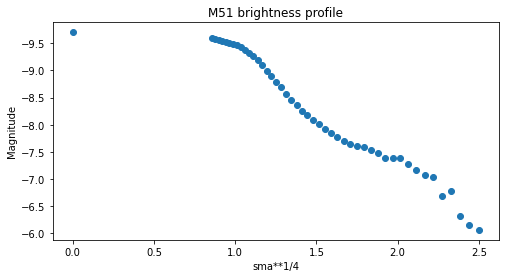

In [25]:
plt.figure(figsize=(8, 4))

plt.scatter(isophote_list.sma**0.25, -2.5*np.log10(isophote_list.intens))
plt.title("M51 brightness profile")
plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

A continuación podemos ver un gráfico que representa la geometría de la elipse en función de la longitud del semieje mayor:

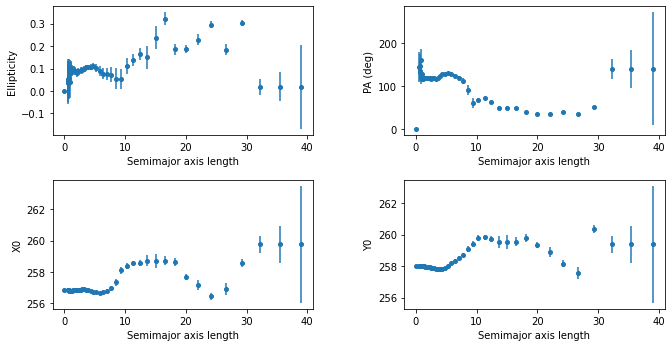

In [26]:
plt.figure(figsize=(10, 5))
plt.figure(1)

plt.subplot(221)
plt.errorbar(isophote_list.sma, isophote_list.eps, yerr=isophote_list.ellip_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Ellipticity')

plt.subplot(222)
plt.errorbar(isophote_list.sma, isophote_list.pa/np.pi*180., yerr=isophote_list.pa_err/np.pi* 80., fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('PA (deg)')

plt.subplot(223)
plt.errorbar(isophote_list.sma, isophote_list.x0, yerr=isophote_list.x0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('X0')

plt.subplot(224)
plt.errorbar(isophote_list.sma, isophote_list.y0, yerr=isophote_list.y0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

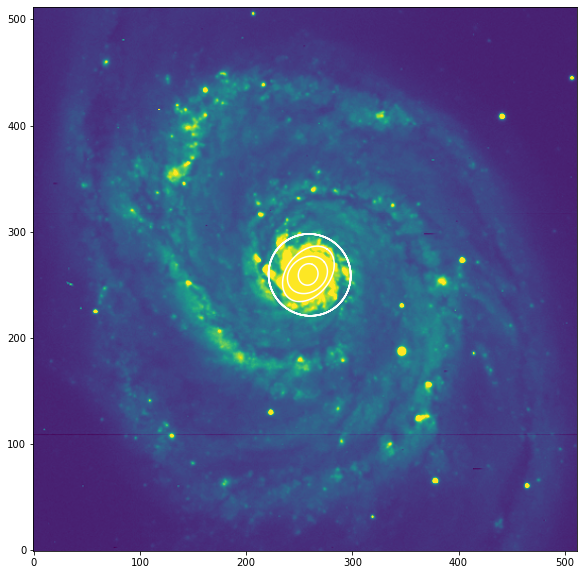

In [27]:
plt.figure("Galaxia M51", figsize=[10, 10])
plt.imshow(data,vmin=np.nanmin(data), vmax=np.median(data)*5, origin='lower')
smas = np.linspace(10, 100, 10)
for sma in smas:
    iso = isophote_list.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    plt.plot(x, y, color='white')
plt.show()

El algoritmo de ajuste asume que una distribución uniforme del brillo superficial dominará la imagen y este no es el mejor caso ya que M51 tiene muchas regiones de formación de estrellas.

Podemos examinar la muestra de brillo elíptica asociada con la elipse que se muestra arriba para tener una idea de lo que está pasando. El siguiente gráfico muestra una gran contaminación de esas regiones HII brillantes.

Text(0.5, 0, 'Angle (deg)')

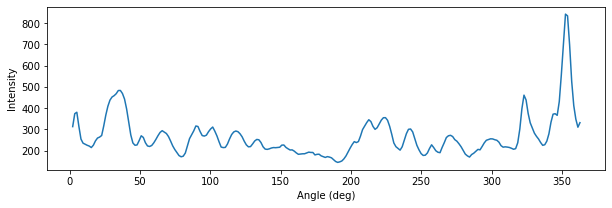

In [28]:
plt.figure(figsize=(10, 3))
plt.plot(iso.sample.values[0] / np.pi*180., iso.sample.values[2])
plt.ylabel("Intensity")
plt.xlabel("Angle (deg)")

Podemos usar sigma-clipping para tratar de mitigarlos.

### Ejecutando Ellipse con sigma-clipping

In [29]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data, geometry=g)

El recorte de Sigma se implementa a través de parámetros en el método ``fit_image``. En este ejemplo, debido a la importante contaminación de la imagen por elementos no elípticos, aplicamos un recorte bastante agresivo.

In [30]:
isophote_list = ellipse.fit_image(sclip=2., nclip=3)
isophote_list.to_table()

<QTable length=60>
       sma               intens           intens_err     ... niter stop_code
                                                         ...                
     float64            float64            float64       ... int64   int64  
------------------ ------------------ ------------------ ... ----- ---------
               0.0  7600.780179543361                0.0 ...     0         0
0.5346972612827552 6852.6807100935885 20.692033269302982 ...    50         0
0.5881669874110307  6765.202337922748  23.86340150284385 ...    10         0
0.6469836861521338  6630.765030253545 12.320765527433458 ...    10         0
0.7116820547673471  6575.021821215169 21.220174559525383 ...    10         0
0.7828502602440819  6467.577748797088 21.124397771814653 ...    10         0
0.8611352862684901  6349.139670056983  23.22393813214937 ...    10         0
0.9472488148953392  6221.610370912634 28.830935033856743 ...    10         0
1.0419736963848731  6057.037687525787 17.797972461776382 ...    50         2
               ...                ...                ... ...   ...       ...
 57.06233412220004 183.93894607873287 0.8911314521483652 ...    10         0
 62.76856753442005  157.0244941004311 1.0149208687004487 ...     3         5
 69.04542428786206 165.79368789450075 0.7264367433184951 ...    28         0
 75.94996671664828 144.71859938538273 0.7608276924745618 ...    50         2
  83.5449633883131  140.4171097907267 0.8168243384497106 ...    12         5
 91.89945972714443 163.24876033978921 0.8375614566366035 ...    19         0
101.08940569985889   159.363569930879 0.8647118417724167 ...    50         2
111.19834626984479 137.33399834679125  0.814892568064858 ...    10         0
122.31818089682928 122.40423192438517 0.6577024332392916 ...     1         5
 134.5499989865122 114.46261257104743 0.7007407741077802 ...     4         5

Observamos cómo la estabilidad añadida proporcionada por el sigma-clipping permite que el ajuste se haga mayor antes de detectar una condición de señal/ruido demasiado baja.

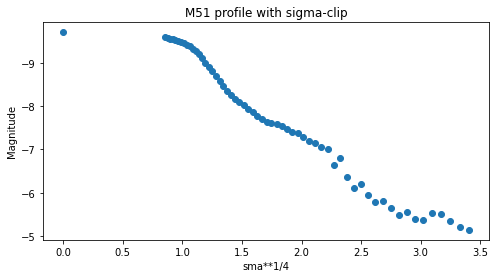

In [31]:
plt.figure(figsize=(8, 4))

plt.scatter(isophote_list.sma**0.25, -2.5*np.log10(isophote_list.intens))
plt.title("M51 profile with sigma-clip")
plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

Algunas de las isófotas en la imagen:

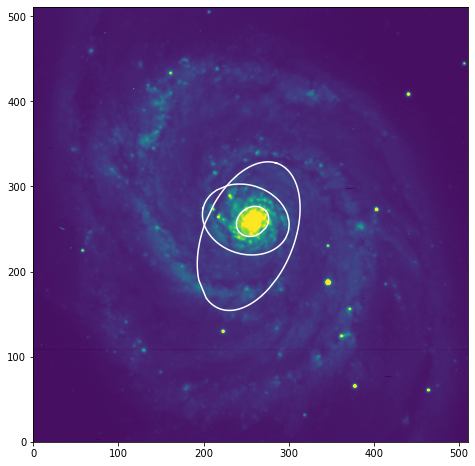

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(data, vmin=0, vmax=1000)
plt.axis([0, 511, 0, 511])

isos = []
smas = [20., 50., 90.]
for sma in smas:
    iso = isophote_list.get_closest(sma)
    isos.append(iso)
    x, y, = iso.sampled_coordinates()
    plt.plot(x, y, color='white')

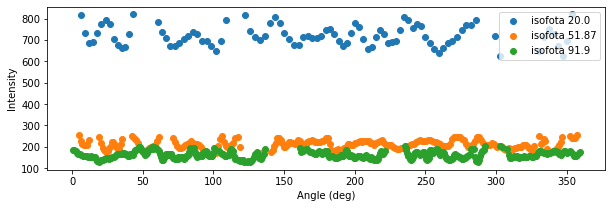

In [33]:
plt.figure(figsize=(10, 3))

for iso in isos:
    angles = ((iso.sample.values[0] + iso.sample.geometry.pa) / np.pi*180.) % 360.
    plt.scatter(angles, iso.sample.values[2], label=f"isofota {np.round(iso.sma, 2)}")
    
plt.xlabel("Angle (deg)")
plt.ylabel("Intensity")
plt.legend(loc='upper right')

### Construcción de un modelo de imagen a partir de los resultados obtenidos por el ajuste Ellipse

Inicialmente ajustamos la imagen de prueba M51. Luego, a partir de los resultados de ajuste construimos una imagen modelo. Finalmente, restamos la imagen del modelo de la imagen original.

In [34]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data, geometry=g)
isophote_list = ellipse.fit_image(sclip=2., nclip=3)

Ahora construimos una imagen modelo.

In [35]:
import numpy as np
from photutils.isophote import build_ellipse_model

model_image = build_ellipse_model(data.shape, isophote_list, fill=np.mean(data[0:10, 0:10]))

Gráfico de la región modelada:

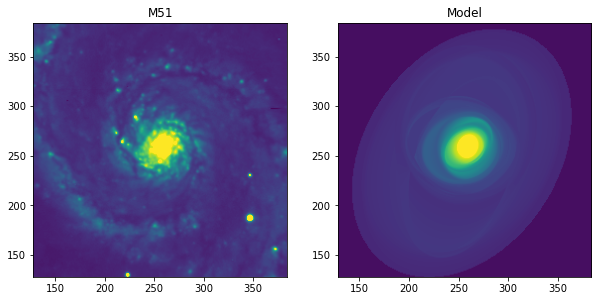

In [36]:
import matplotlib
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
limits = [128, 384]

ax1.imshow(data, vmin=0, vmax=1000)
ax1.set_title("M51")
ax1.set_xlim(limits)
ax1.set_ylim(limits)

ax2.imshow(model_image, vmin=0, vmax=1000)
ax2.set_title("Model")
ax2.set_xlim(limits)
ax2.set_ylim(limits)
plt.show()

## Test de galaxia elíptica M105

Elegimos una imagen de dominio público de M105 tal como se publicó en `asd.gsfc.nasa.gov`.

In [37]:
url = 'https://github.com/astropy/photutils-datasets/raw/main/data/isophote/M105-S001-RGB.fits'
path = download_file(url)
hdu = fits.open(path)
data = hdu[0].data[0]
hdu.close()

Repetimos el procedimiento anterior pero esta vez pasando una instancia de ``EllipseGeometry`` al constructor ``Ellipse``, ya que el centro de la galaxia no coincide con el centro de la imagen. También pasamos valores de primera estimación para los parámetros de ángulo de posición y elipticidad, obtenidos de la inspección visual de la imagen.

In [38]:
from photutils.isophote import Ellipse, EllipseGeometry, build_ellipse_model
g = EllipseGeometry(530., 511, 10., 0.1, 10./180.*np.pi)
g.find_center(data)

ellipse = Ellipse(data, geometry=g)
isolist = ellipse.fit_image()
isophote_list.to_table()

INFO: Found center at x0 = 530.0, y0 = 512.0 [photutils.isophote.geometry]


<QTable length=60>
       sma               intens           intens_err     ... niter stop_code
                                                         ...                
     float64            float64            float64       ... int64   int64  
------------------ ------------------ ------------------ ... ----- ---------
               0.0  7600.780179543361                0.0 ...     0         0
0.5346972612827552 6852.6807100935885 20.692033269302982 ...    50         0
0.5881669874110307  6765.202337922748  23.86340150284385 ...    10         0
0.6469836861521338  6630.765030253545 12.320765527433458 ...    10         0
0.7116820547673471  6575.021821215169 21.220174559525383 ...    10         0
0.7828502602440819  6467.577748797088 21.124397771814653 ...    10         0
0.8611352862684901  6349.139670056983  23.22393813214937 ...    10         0
0.9472488148953392  6221.610370912634 28.830935033856743 ...    10         0
1.0419736963848731  6057.037687525787 17.797972461776382 ...    50         2
               ...                ...                ... ...   ...       ...
 57.06233412220004 183.93894607873287 0.8911314521483652 ...    10         0
 62.76856753442005  157.0244941004311 1.0149208687004487 ...     3         5
 69.04542428786206 165.79368789450075 0.7264367433184951 ...    28         0
 75.94996671664828 144.71859938538273 0.7608276924745618 ...    50         2
  83.5449633883131  140.4171097907267 0.8168243384497106 ...    12         5
 91.89945972714443 163.24876033978921 0.8375614566366035 ...    19         0
101.08940569985889   159.363569930879 0.8647118417724167 ...    50         2
111.19834626984479 137.33399834679125  0.814892568064858 ...    10         0
122.31818089682928 122.40423192438517 0.6577024332392916 ...     1         5
 134.5499989865122 114.46261257104743 0.7007407741077802 ...     4         5

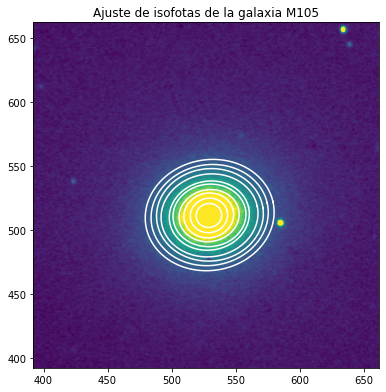

In [39]:
fig, (ax1) = plt.subplots(figsize=(14, 5), nrows=1, ncols=1)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, vmin=1464., vmax=1480.)
ax1.set_title('Ajuste de isofotas de la galaxia M105')
limits = [512-120, 512+150]
ax1.set_xlim(limits)
ax1.set_ylim(limits)

smas = np.linspace(10, 50, 10)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

Construimos una imagen modelo

In [40]:
fill = np.mean(data[20:120, 20:120])
model_image = build_ellipse_model(data.shape, isolist, fill=fill)

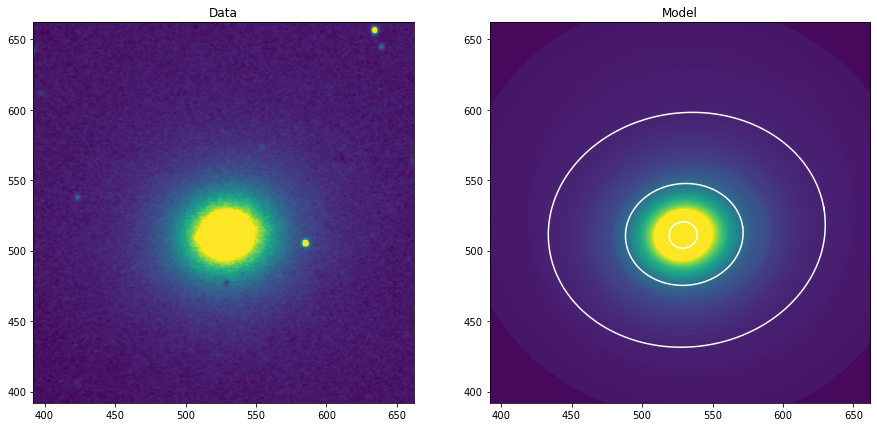

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
limits = [512-120, 512+150]
ax1.imshow(data, vmin=1464., vmax=1480.)
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.set_title("Data")

ax2.imshow(model_image, vmin=1464., vmax=1480.)
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.set_title("Model")


# overplot a few isophotes on the residual map
iso1 = isolist.get_closest(10.)
iso2 = isolist.get_closest(40.)
iso3 = isolist.get_closest(100.)

plt.axis([512-120, 512+150, 512-120, 512+150])
x, y, = iso1.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso2.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso3.sampled_coordinates()
plt.plot(x, y, color='white')

Comprobamos cómo quedan los perfiles radiales.

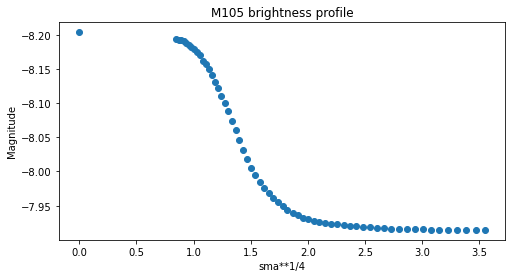

In [42]:
plt.figure(figsize=(8, 4))

plt.scatter(isolist.sma**0.25, -2.5*np.log10(isolist.intens))
plt.title("M105 brightness profile")
plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

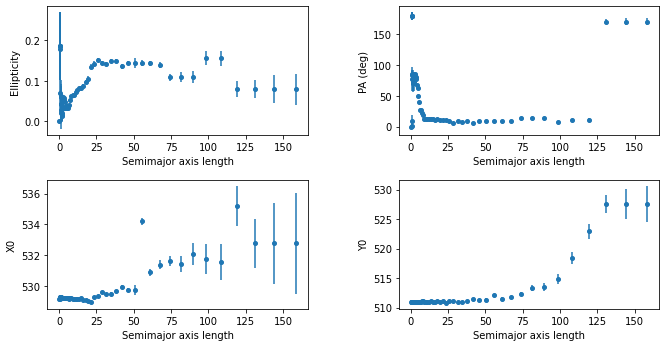

In [43]:
plt.figure(figsize=(10, 5))
plt.figure(1)

plt.subplot(221)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Ellipticity')

plt.subplot(222)
plt.errorbar(isolist.sma, isolist.pa/np.pi*180., yerr=isolist.pa_err/np.pi* 80., fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('PA (deg)')

plt.subplot(223)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('X0')

plt.subplot(224)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

Podemos observar cómo la presencia de la estrella brillante hace que aparezca un componente no elíptica alrededor de una longitud del semieje mayor de $\sim 50$ píxeles.

Repitamos el procedimiento con el recorte sigma habilitado para eliminar la estrella y ver el efecto en la imagen residual.

Tenga en cuenta que no es necesario crear una nueva instancia de ``Ellipse``, ya que nada cambió ni en el mapa de píxeles de entrada ni en la geometría de la elipse de entrada.

In [44]:
isolist2 = ellipse.fit_image(sclip=3., nclip=3)

fill = np.mean(data[20:120, 20:120])
model_image2 = build_ellipse_model(data.shape, isolist2, fill=fill)

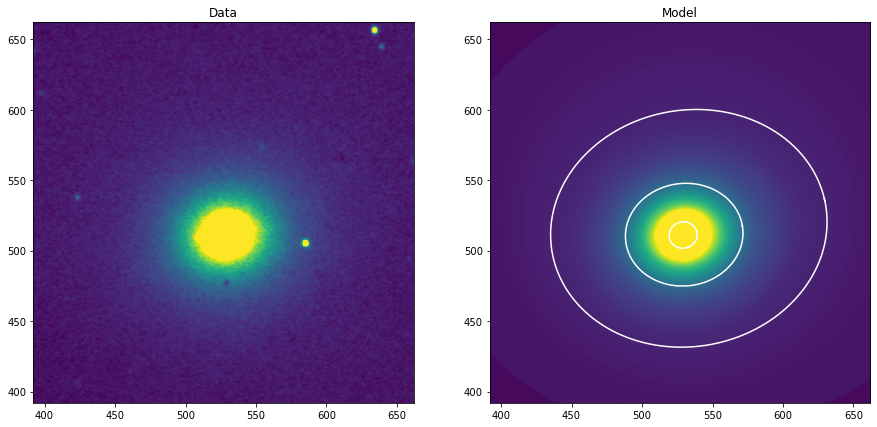

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
limits = [512-120, 512+150]
ax1.imshow(data, vmin=1464., vmax=1480.)
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.set_title("Data")

ax2.imshow(model_image2, vmin=1464., vmax=1480.)
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.set_title("Model")


# overplot a few isophotes on the residual map
iso1 = isolist2.get_closest(10.)
iso2 = isolist2.get_closest(40.)
iso3 = isolist2.get_closest(100.)

plt.axis([512-120, 512+150, 512-120, 512+150])
x, y, = iso1.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso2.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso3.sampled_coordinates()
plt.plot(x, y, color='white')

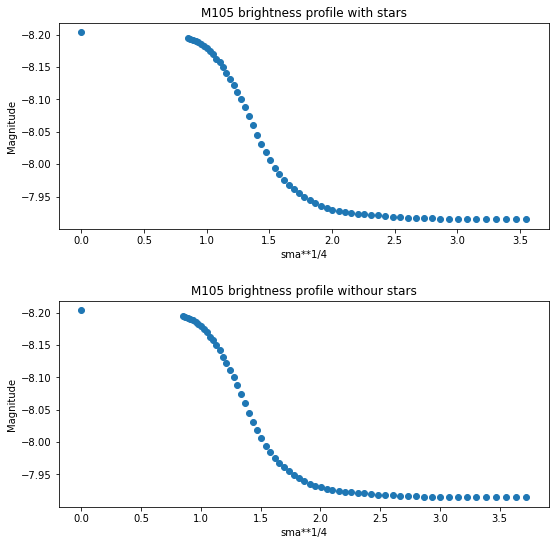

In [46]:
plt.figure(figsize=(8, 8))
plt.figure(1)

plt.subplot(211)
plt.scatter(isolist.sma**0.25, -2.5*np.log10(isolist.intens))
plt.title("M105 brightness profile with stars")
plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

plt.subplot(212)
plt.scatter(isolist2.sma**0.25, -2.5*np.log10(isolist2.intens))
plt.title("M105 brightness profile withour stars")
plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

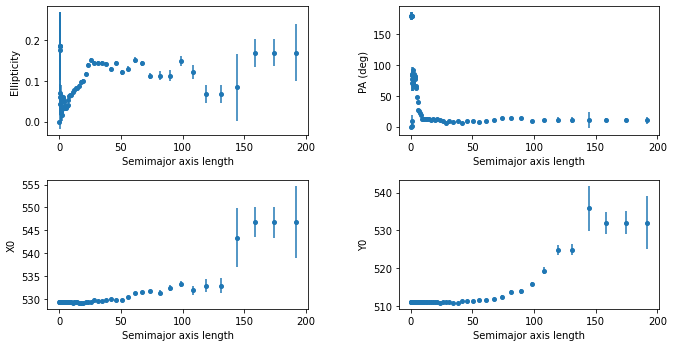

In [47]:
plt.figure(figsize=(10, 5))
plt.figure(1)

plt.subplot(221)
plt.errorbar(isolist2.sma, isolist2.eps, yerr=isolist2.ellip_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Ellipticity')

plt.subplot(222)
plt.errorbar(isolist2.sma, isolist2.pa/np.pi*180., yerr=isolist2.pa_err/np.pi* 80., fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('PA (deg)')

plt.subplot(223)
plt.errorbar(isolist2.sma, isolist2.x0, yerr=isolist2.x0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('X0')

plt.subplot(224)
plt.errorbar(isolist2.sma, isolist2.y0, yerr=isolist2.y0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

## Análisis del brillo superficial de la galaxia espiral NGC 628

### Distribución del brillo superficial: *ellipse fitting*

In [48]:
url_g = 'https://dr9.sdss.org/sas/dr9/boss/photoObj/frames/301/7845/2/frame-g-007845-2-0104.fits.bz2'
url_r = 'https://dr9.sdss.org/sas/dr9/boss/photoObj/frames/301/7845/2/frame-r-007845-2-0104.fits.bz2'

In [49]:
from astropy.utils.data import download_file

#path_g = download_file(url_g)
#path_r = download_file(url_r)

Abrimos nuestras imagenes de la galaxias M78 del catalogo SDSS en las bandas G y R. 

In [50]:
from astropy.io import fits
path_g = 'imagenes/isofotas/g.fit'
path_r = 'imagenes/isofotas/r.fit'

g_hdu = fits.open(path_g)
g_header = g_hdu[0].header
g_data = g_hdu[0].data
g_hdu.close()

r_hdu = fits.open(path_r)
r_header = r_hdu[0].header
r_data = r_hdu[0].data
r_hdu.close()

In [51]:
g_header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4735092988.65 / 1st row Number of seconds since Nov 17 1858    
RA      =            24.903097 / 1st row RA of telescope boresight (deg)        
DEC     =            16.513296 / 1st row Dec of telescope boresight (degrees)   
SPA     =              95.876  / 1st row Cam col position angle wrt N (deg)     
IPA     =              34.84

### Ajuste de isofotas en la banda G

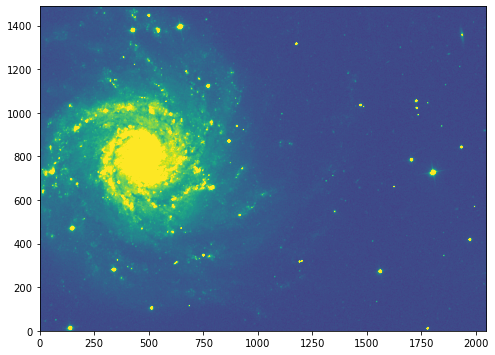

In [52]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))
plt.imshow(g_data, vmin=np.min(g_data), vmax=np.mean(g_data)*6 ,origin='lower')

In [53]:
from photutils.isophote import EllipseGeometry, Ellipse
x0 = 470.    # center position
y0 = 790.    # center position
sma = 50.   # starting semi-major axis length in pixels
eps = 0.5    # ellipticity
pa = 120. / 180. * np.pi  # position angle

g = EllipseGeometry(x0, y0, sma, eps, pa)
g.find_center(g_data)
ellipse = Ellipse(g_data, geometry=g)

INFO: Found center at x0 = 468.0, y0 = 795.0 [photutils.isophote.geometry]


In [54]:
isolist_g = ellipse.fit_image(sclip=3., nclip=3)

In [55]:
isolist_g.to_table()

<QTable length=55>
       sma                intens             intens_err      ... niter stop_code
                                                             ...                
     float64             float64              float64        ... int64   int64  
------------------ ------------------- --------------------- ... ----- ---------
               0.0   7.036626190437779                   0.0 ...     0         0
0.5153723524097881   6.978559618937684  0.008576114152388018 ...    10         0
0.5669095876507669   6.960915542591993   0.01163991868890307 ...    15         0
0.6236005464158436   6.913445060192853  0.014810388687327002 ...    14         0
 0.685960601057428  6.8171311547719675  0.018494760884981795 ...    10         0
0.7545566611631708   6.719546613052389   0.01917574088778771 ...    10         0
0.8300123272794878   6.633136981338138  0.017307265730366405 ...    10         0
0.9130135600074366   6.540013643189832   0.01761471303679338 ...    10         0
1.0043149160081803  6.4251187693363025  0.017538080327585717 ...    10         0
               ...                 ...                   ... ...   ...       ...
 34.15067276825353  0.9085946752882448  0.008412769157337614 ...    10         0
 37.56574004507888  0.8072671486823538  0.005562672982446853 ...    50         2
 41.32231404958677    0.74260716814388  0.004606763004680098 ...    12         0
 45.45454545454545  0.6675655260829918  0.004019052663012127 ...    10         0
              50.0  0.6233688395896823 0.0038857790540935753 ...    20         0
 55.00000000000001  0.5527354045615789 0.0034136796328234566 ...    10         0
60.500000000000014  0.4641562041293947 0.0026370299400790696 ...    50         2
 66.55000000000003  0.4573494796138069 0.0027404038997232505 ...    50         2
 73.20500000000004 0.41787458466002114 0.0026742808876279384 ...     8         5
 80.52550000000005 0.38521370470337724 0.0025130787847420155 ...    17         5

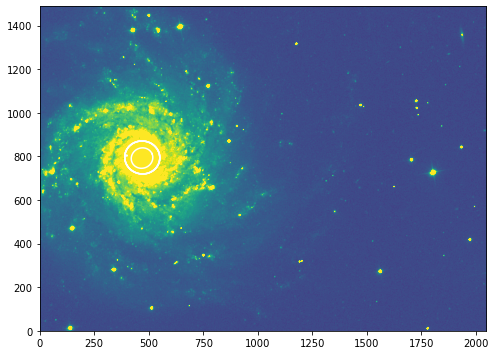

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(g_data, vmin=np.min(g_data), vmax=np.mean(g_data)*6 ,origin='lower')
#ax.set_title("791 wide filter")
#ax.set_xlim([300, 900])
#ax.set_ylim([700, 1200])

# go to the outermost successfully fitted ellipse at sma=235
isos = []
for sma in [50., 100., 150., 200., 700.]:
    iso = isolist_g.get_closest(sma)
    isos.append(iso)
    x, y, = iso.sampled_coordinates()
    plt.plot(x, y, color='w')

Text(0, 0.5, 'Intensidad')

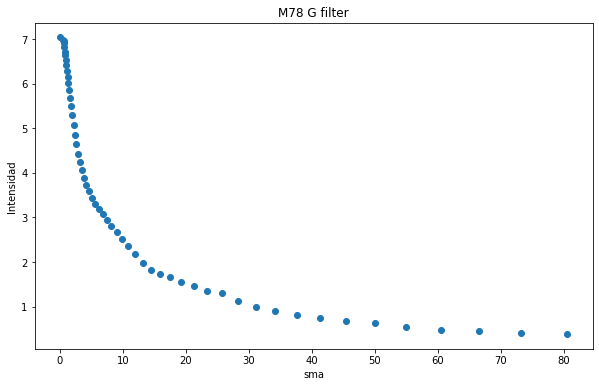

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_g.sma, isolist_g.intens)
plt.title("M78 G filter")
plt.xlabel('sma')
plt.ylabel('Intensidad')

### Ajuste de isofotas en la banda R

In [58]:
ellipse = Ellipse(r_data, geometry=g)
isolist_r = ellipse.fit_image(sclip=3., nclip=3)

In [59]:
isolist_r.to_table()

<QTable length=78>
       sma                intens        ... niter stop_code
                                        ...                
     float64             float64        ... int64   int64  
------------------ -------------------- ... ----- ---------
               0.0   15.115861775825355 ...     0         0
0.5153723524097881    14.80854481009532 ...    10         0
0.5669095876507669   14.744955711536875 ...    10         0
0.6236005464158436   14.654245875551062 ...    10         0
 0.685960601057428   14.411300732930584 ...    10         0
0.7545566611631708   14.208786191943034 ...    10         0
0.8300123272794878   13.923481065183267 ...    10         0
0.9130135600074366   13.576650547763618 ...    10         0
1.0043149160081803   13.213446815898358 ...    10         0
               ...                  ... ...   ...       ...
 305.7954522420732   0.2299015931811956 ...    10         0
336.37499746628055    0.181010503486312 ...    11         0
 370.0124972129086  0.15571082955865462 ...    10         0
 407.0137469341995  0.13239741264163696 ...    10         0
 447.7151216276195  0.08726337479221832 ...    50         2
 492.4866337903815  0.07803196990125381 ...    11         0
 541.7352971694197  0.06311041079140965 ...    11         0
 595.9088268863617 0.042310312256476225 ...    50         2
  655.499709574998 0.033515337426171396 ...    50         2
 721.0496805324979  0.02227344409526827 ...     2         1

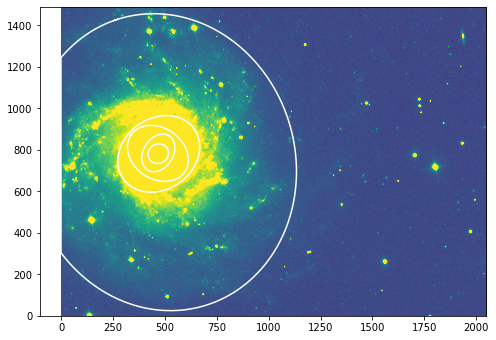

In [60]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(r_data, vmin=np.min(g_data), vmax=np.mean(g_data)*6 ,origin='lower')
#ax.set_title("791 wide filter")
#ax.set_xlim([300, 900])
#ax.set_ylim([700, 1200])

# go to the outermost successfully fitted ellipse at sma=235
isos = []
for sma in [50., 100., 150., 200., 700.]:
    iso = isolist_r.get_closest(sma)
    isos.append(iso)
    x, y, = iso.sampled_coordinates()
    plt.plot(x, y, color='w')

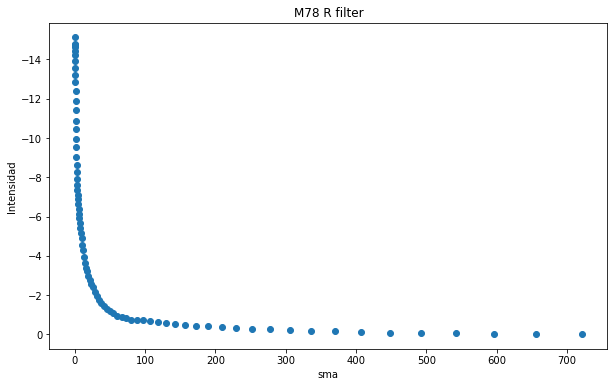

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_r.sma, -isolist_r.intens)
plt.title("M78 R filter")
plt.xlabel('sma')
plt.ylabel('Intensidad')
plt.gca().invert_yaxis()

### Nivel de Ruido de las Imágenes (stdev)

Vamos a obtener el nivel de ruido que tenemos en nuestras imágenes. Para ello nos iremos a una zona donde sepamos que no haya brillo de la galaxia ni de estrellas, es decir una zona donde sea lo mas oscuro posible y solo veamos píxeles de ruido.
Una vez que tengamos la zona localizada mediante la desviación cuadrática media stdev podremos ver el nivel de ruido que tenemos en nuestra imagen.

Esto nos servirá para poder distingir señal de ruido a medida que nos vayamos alejando del centro de la galaxia.

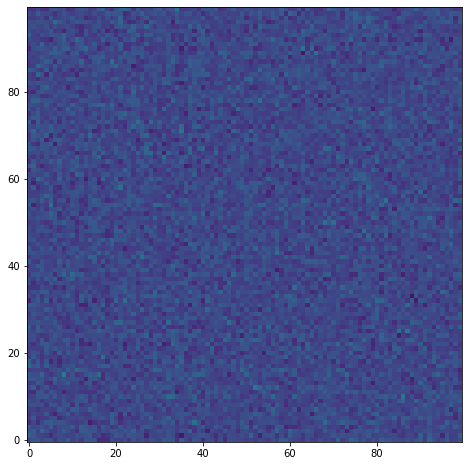

In [62]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))
plt.imshow(g_data[0:100,1900:2000], vmin=np.min(g_data), vmax=np.mean(g_data)*6 ,origin='lower')

In [63]:
g_std = np.std(g_data[0:100,1900:2000])
r_std = np.std(r_data[0:100,1900:2000])

g_std, r_std

(0.018639611, 0.031717688)

### Escala de píxel en arcsec/pix y en pc/pix de las imágenes.

Mediante los parámetros observados en la cabecera de nuestras imágenes calculamos el diámetro
angular como: $ D = \sqrt{CD1\_1^2 + CD2\_1^2} *3600 $

In [64]:
D_arc = np.sqrt(g_header['CD1_1']**2+g_header['CD2_1']**2)*3600 #arcsec/pix
D_arc

0.39595593301525844

Para obtener el valor de parsec por pixel deberemos hacer la transformación del diámetro angular en arcoseg/pixel a radianes/pixel y este multiplicarlo por la distancia a la galaxia. Para
el valor de la distancia a la galaxia hemos tomado como referencia el método SNII optical en la banda B, $d = 7.2 Mpc$.

In [65]:
D_pc = (D_arc/3600)*(np.pi/180)*(7.2*10**6)
D_pc #pc/pixel

13.821469447844759

### Calibración del flujo

Para calcular el brillo superficial que tiene nuestra galaxia medido a través de las imágenes recogidas, tenemos que tener en cuenta que la medida de intensidad de las imágenes esta en nanomaggies. Podemos pasar de nanomaggies a magnitudes usando la siguiente formula:

$$m=22.5[mag]-2.5log(F[nanomaggies])$$

y por lo tanto podemos calcular el brillo superficial mediante el uso de la resolución angular.

$$\mu=2.5log(\frac{F}{F_{0}D^{2}})=-2.5\left(log\frac{F}{F_{0}}-log\left(D^{2}\right)\right)=m+2.5log\left(D^{2}\right)
=22.5[mag]-2.5log(F)+2.5log\left(D^{2}\right)=\boxed{22.5[mag]-2.5log(F/D^{2})}$$

In [66]:
def mu(nanomaggies, D):
    return 22.5-2.5*np.log10(nanomaggies/D**2)

Para calcular la magnitud límite vamos a considerar que el brillo mas bajo medible es 3 veces el ruido de fondo que tengamos en nuestra imagen.

In [67]:
mag_lim_g = mu(3*g_std, D_arc) #mag/arcsec**2
mag_lim_r = mu(3*r_std, D_arc) #mag/arcsec**2

### Ajustar el perfil de brillo del disco y obtener la longitud de escala

#### Banda G

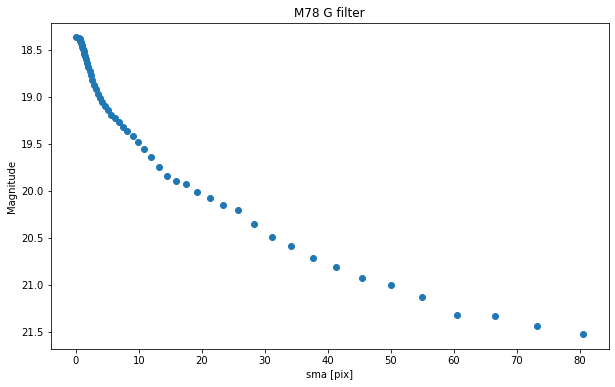

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_g.sma, mu(isolist_g.intens, D_arc))
plt.title("M78 G filter")
plt.xlabel('sma [pix]')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

In [69]:
np.where(isolist_g.sma <=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),)

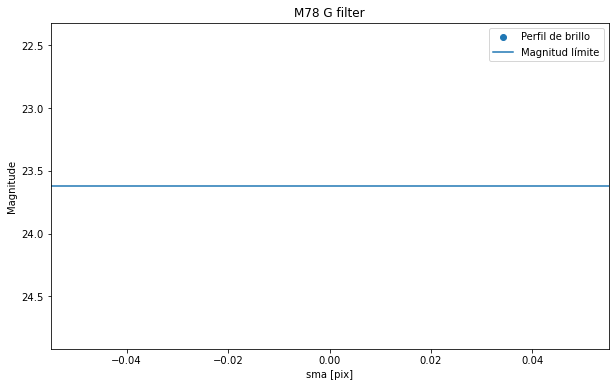

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_g.sma[55:], mu(isolist_g.intens[55:], D_arc), label= 'Perfil de brillo')
plt.title("M78 G filter")
plt.xlabel('sma [pix]')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.axhline(y=mag_lim_g, label='Magnitud límite')
plt.legend()

In [71]:
np.where(isolist_g.sma <=500)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),)

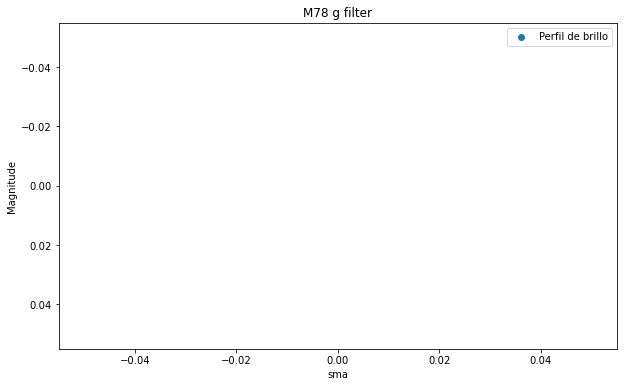

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_g.sma[55:73], mu(isolist_g.intens[55:73], D_arc), label= 'Perfil de brillo')
plt.title("M78 g filter")
plt.xlabel('sma')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.legend()

#### Ajuste lineal en la banda G

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Definimos el modelo lineal
line_orig = models.Linear1D(slope=1.0, intercept=0.5)
fit = fitting.LinearLSQFitter()
# Inicializamos el modelo lineal
line_init = models.Linear1D()

# Ajuste de los datos
fitted_line_g = fit(line_init, isolist_g.sma[55:73], mu(isolist_g.intens[55:73], D_arc))

/home/zerjillo/anaconda3/envs/cursoAstronomia/lib/python3.8/site-packages/astropy/modeling/fitting.py:773: RuntimeWarning: invalid value encountered in true_divide
  lacoef /= scl[:, np.newaxis] if scl.ndim < rhs.ndim else scl


In [74]:
fitted_line_g

<Linear1D(slope=nan, intercept=nan)>

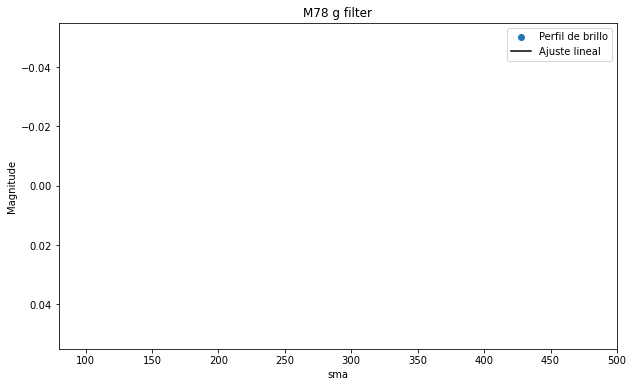

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_g.sma[55:73], mu(isolist_g.intens[55:73], D_arc), label= 'Perfil de brillo')
plt.plot(x, fitted_line_g(x), 'k-', label='Ajuste lineal')
plt.title("M78 g filter")
plt.xlabel('sma')
plt.ylabel('Magnitude')
plt.xlim(80, 500)
plt.gca().invert_yaxis()
plt.legend()

La longitud de escala es el radio en el que la galaxia es un factor e (~2,7) menos brillante que en su centro. Debido a la diversidad de formas y tamaños de las galaxias, no todos los discos galácticos siguen esta sencilla forma exponencial en sus perfiles de brillo. $$I_r = I_0\:exp \left[ \frac{-R}{H_r}\right]$$

En galaxias espirales el perfil de brillo superficial en el disco se modeliza como: $$ \mu_{disco} \left( R \right)=\mu_{0}+1.086\left(\frac{R}{H_{R}}\right) $$ donde $\mu_0$ es el brillo de la superficial central y $H_r$ la longitud de la escala del disco. 

Como hemos obtenido la representacion de µ frente a R y hemos ajustado la recta, podemos obtener $H_R$ mediante la pendiente: $$H_r = \frac{1.086}{b}$$
Con un error asociado de :
$$\Delta H_r = \frac{1.086}{b^2}\Delta b$$

In [76]:
fitted_line_g.slope[0] # pendiente

nan

In [77]:
1.086/fitted_line_g.slope[0] #pixeles

nan

In [78]:
1.086/(fitted_line_g.slope[0]*D_arc) #arcsec

nan

In [79]:
Hr_g = 1.086/fitted_line_g.slope[0]*D_pc #pc

#### Banda r

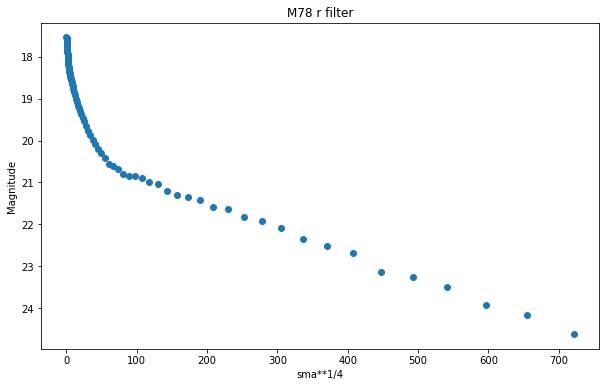

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_r.sma, mu(isolist_r.intens, D_arc))
plt.title("M78 r filter")
plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

In [81]:
np.where(isolist_r.sma <=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),)

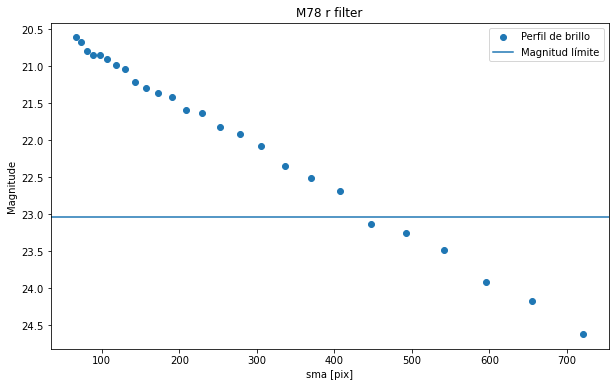

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_r.sma[52:], mu(isolist_r.intens[52:], D_arc), label= 'Perfil de brillo')
plt.title("M78 r filter")
plt.xlabel('sma [pix]')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.axhline(y=mag_lim_r, label='Magnitud límite')
plt.legend()

In [83]:
np.where(isolist_r.sma <=450)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),)

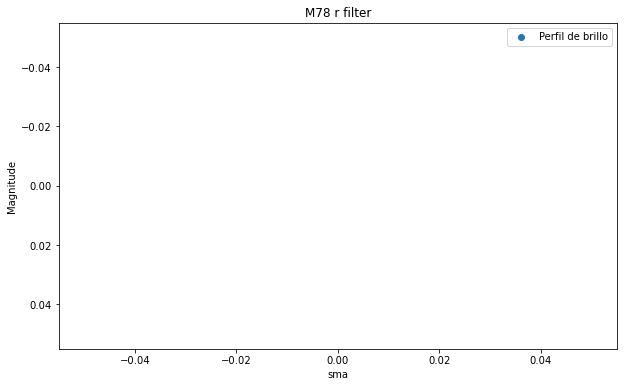

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_g.sma[55:72], mu(isolist_g.intens[55:72], D_arc), label= 'Perfil de brillo')
plt.title("M78 r filter")
plt.xlabel('sma')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.legend()

#### Ajuste lineal en la banda r

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Definimos el modelo lineal
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# Inicializamos el modelo lineal
line_init = models.Linear1D()

# Ajuste de los datos
fitted_line_r = fit(line_init, isolist_r.sma[52:72], mu(isolist_r.intens[52:72], D_arc))

In [86]:
fitted_line_r

<Linear1D(slope=0.00599491, intercept=20.28690473)>

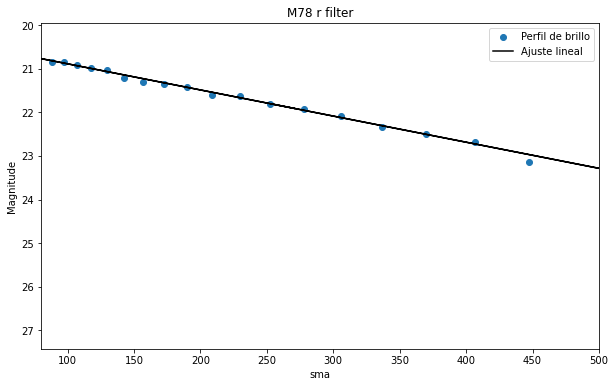

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(isolist_r.sma[55:73], mu(isolist_r.intens[55:73], D_arc), label= 'Perfil de brillo')
plt.plot(x, fitted_line_r(x), 'k-', label='Ajuste lineal')
plt.title("M78 r filter")
plt.xlabel('sma')
plt.ylabel('Magnitude')
plt.xlim(80, 500)
plt.gca().invert_yaxis()
plt.legend()

#### Longitudes de escala

In [88]:
fitted_line_r.slope[0]

0.0059949075577498505

In [89]:
1.086/fitted_line_r.slope[0] #pixeles

181.1537525038373

In [90]:
1.086/fitted_line_r.slope[0]*D_arc #arcsec

71.72890309187211

In [91]:
Hr_r = 1.086/fitted_line_r.slope[0]*D_pc #pc

| Banda | H_r[arcsec] | H_r[pc] |
| --- | --- | --- |
| g | 72.06 | 2789.89 |
| r | 79.92 | 2515.59 |

In [92]:
Hr_g, Hr_r

(nan, 2503.811055594218)

En este [articulo](https://ui.adsabs.harvard.edu/abs/1992A%26A...256...79N/abstract) podemos encontrar valores aproximados a los que hemos obtenido nosotros, teniendo en cuenta que ellos han cogido una distancia a la galaxia de $10.4 \: Mpc$:

| Banda  | H_r[pc] |
| --- | --- |
| U | 4.26 |
| B | 3.44 |
| V | 3.27 |
| R | 3.29 |
| I | 3.31 |

In [93]:
D_pc = (D_arc/3600)*(np.pi/180)*(10.4*10**6)

In [94]:
Hr_g = 1.086/fitted_line_g.slope[0]*D_pc #pc
Hr_r = 1.086/fitted_line_r.slope[0]*D_pc #pc
Hr_g, Hr_r

(nan, 3616.6159691916487)

### Diagramas g-r

Como hemos calculado el brillo superficial de la galaxia podemos calcular el color simplemente
restando los dos brillos superficiales µG y µR, ya que

In [95]:
g_data_mag = 22.5-2.5 * np.log10(g_data/D_arc**2)
r_data_mag = 22.5-2.5 * np.log10(r_data/D_arc**2)

<ipython-input-95-dfe2658c2d03>:1: RuntimeWarning: invalid value encountered in log10
  g_data_mag = 22.5-2.5 * np.log10(g_data/D_arc**2)
<ipython-input-95-dfe2658c2d03>:2: RuntimeWarning: invalid value encountered in log10
  r_data_mag = 22.5-2.5 * np.log10(r_data/D_arc**2)


In [96]:
g_r = g_data_mag - r_data_mag

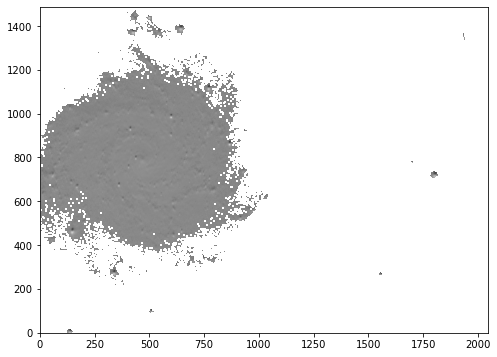

In [97]:
plt.figure(figsize=(10, 6))

plt.imshow(g_r, cmap='gray')

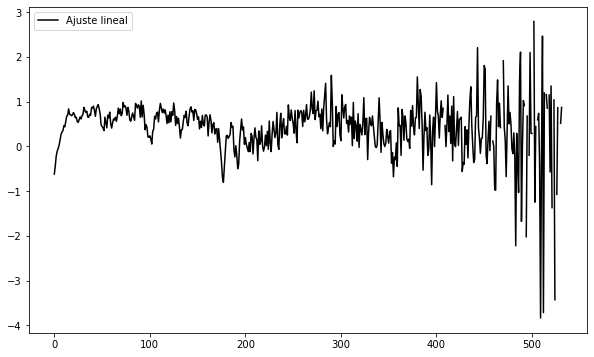

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(g_r[795,468:1000])), g_r[795,468:1000], 'k-', label='Ajuste lineal')
plt.legend()

In [99]:
g_r = mu(isolist_g.intens[:73],D_arc) - mu(isolist_r.intens[:73],D_arc)

ValueError: operands could not be broadcast together with shapes (55,) (73,) 

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(isolist_r.sma[:73], g_r, 'k-', label='Ajuste lineal')
plt.xlabel('sma')
plt.ylabel('g-r')
plt.legend()
plt.show()

Podemos ver un decaimiento en el índice de color hacia el rojo a medida que nos alejamos del radio pero tenemos zonas donde el indice de color se desplaza hacia el azul que se debe a las diferentes edades de las poblaciones estelares del disco, el cual está dominado en las partes externas por estrellas más jóvenes.